# MOSFET Device Physics

A few definitions:

$V_{DS}$
: Voltage from drain to source.

$V_{GS}$
: Voltage from gate to source.

## Regimes of Operation

```{figure} ../images/fig1.svg
---
height: 350px
name: fig1
---
Physical model of a transistor and its circuit representation.
```

In this configuration, the transistor is off. The p-substrate is almost an 
insulator, and the transistor doesn't conduct. There's no current, because 
there's nowhere for it to go!

```{figure} ../images/fig2.svg
---
height: 350px
name: fig2
---
The gate voltage is less than the drain voltage, and the transistor is off.
```

The gate voltage is rising, repelling p-type carriers away from the channel.

In this situation, the electrons are still all attached to their atoms' nucleus
and are not moving. The negative ions are forming a depletion region; there are 
no free carriers, but the net charge of the region in the material is negative. 

Since there are no holes or carriers to conduct electrons, the current is still 
zero.

doping
: the introduction of impurities into a semiconductor crystal. It can leave 
  open holes for electrons to fill in the crystal lattice, or have too many 
  electrons to fill the valence shell. This means free carriers are introduced, 
  but since the total number of protons and electrons are equal, it still 
  leaves the material electrically neutral.

```{figure} ../images/fig3.svg
---
height: 350px
name: fig3
---
The gate voltage is greater than the drain voltage, the transistor is on, and
current starts to flow.
```

The gate voltage is now greater than the threshold voltage, and the electrons 
form a channel close to the gate. Free electrons can detach from their nucleus
and flow. Current flow from the drain to the source is now non-zero.

```{figure} ../images/fig4.svg
---
height: 350px
name: fig4
---
3D view of a MOSFET with length and width dimensions labelled.
```

Obviously, when $V_{\text{GS}} \lt V_{\text{th}}$, $I_D = 0$. When the gate 
voltage surpasses the threshold voltage, the current through the drain is given
by

$$
    I_D = \frac{1}{2} \mu c_{\text{ox}} \frac{W}{L} \left[ 2 (V_{\text{GS}} - V_{\text{th}}) V_{\text{DS}} - V_{DS}^2 \right]
$$ (id_vgs_gt_vth)

where $\mu$ is the electron mobility and $c_{\text{ox}}$ is the gate oxide 
capacitance per unit area.

The larger $L$ is, the smaller $I_D$ is. Conversely, the wider $W$ is, the
greater $I_D$ is.

In [80]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from myst_nb import glue

matplotlib.rc('font', size=18)

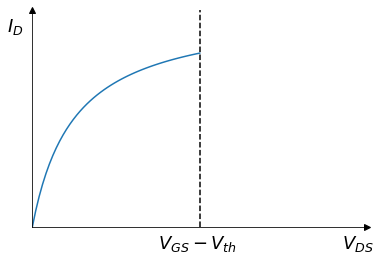

In [84]:
fig, ax = plt.subplots()

# Textbook style plots:
# https://stackoverflow.com/a/12998531/11530613
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False
)
# Spines with arrows: 
# https://matplotlib.org/stable/gallery/spines/centered_spines_with_arrows.html
ax.spines[["left", "bottom"]].set_position(("data", 0))
ax.spines[["top", "right"]].set_visible(False)
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

x = np.linspace(0,4)
y = x / (1 + x)
plt.plot(x, y)
plt.axvline(4, color='k', ls='--')
plt.xlim(0, 8)
plt.ylim(0, 1)
plt.text(-0.6, 0.9, "$I_D$")
plt.text(7.4, -0.1, "$V_{DS}$")
plt.text(3.0, -0.1, "$V_{GS} - V_{th}$")
# plt.show()
glue("boot_fig", fig, display=False)

```{glue:figure} boot_fig
:figwidth: 400px
:name: "fig-boot"

Current vs. drain voltage (assume $V_{GS} \gt V_{th}$).
```

Note that in the above plot, the current is initially linear until the
second term catches up. At $V_{\text{DS}} = V_{\text{GS}} - V_{\text{th}}$, pinchoff occurs. 